<a href="https://colab.research.google.com/github/IAT-ComputationalCreativity-Spring2025/Week2-Randomness-and-Chaos/blob/main/colors_arranged_by_chance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opensimplex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 6.5 MB/s eta 0:00:00


# Probability Distributions and Noise in Generative Art
Creating controlled randomness

## Why Different Distributions?


- Uniform random isn't always "natural"

- Real-world phenomena follow patterns

- Different distributions create different effects

- Key to controlling aesthetic outcomes

Let's explore various distributions with randomly assigned colors

### Imports and Functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

This is a simple function to display a histogram based on a numpy array to show the distribution of sampled values

In [3]:
def plot_distribution(samples):
    count, bins, ignored = plt.hist(samples, 15, density=False)
    plt.hist(bins[:-1], bins)
    plt.show()

This function takes an array of pixels and then expands them to a given size, effectively creating a grid of colored squares

In [4]:
def assign_colors_by_chance(samples, grid_size, image_size):
    img = Image.fromarray(np.uint8(samples.reshape(grid_size)))
    img = img.resize(image_size, Image.NEAREST)

    return img

In [5]:
# 50 squares by 50 squares with 3 channels for rgb
grid_size = (50, 50, 3)
n_samples = grid_size[0] * grid_size[1] * grid_size[2]

image_size = (512, 512)

## Uniform Distribution

### Properties

- Equal probabilities for all outcomes

- Range defined my min and max values

- "Pure" randomness

### Artistic Applications

- Random color selection

- Particle starting positions

- White noise

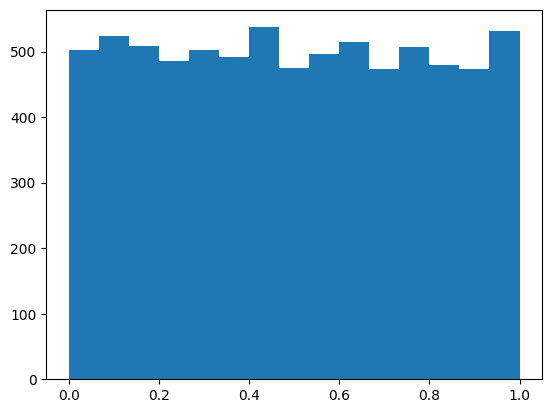

In [6]:
samples = np.random.uniform(0, 1, n_samples)

plot_distribution(samples)

Because the parameters for the uniform distribution are the min and max values, we can simply generate the values between 0 and 255 for RGB

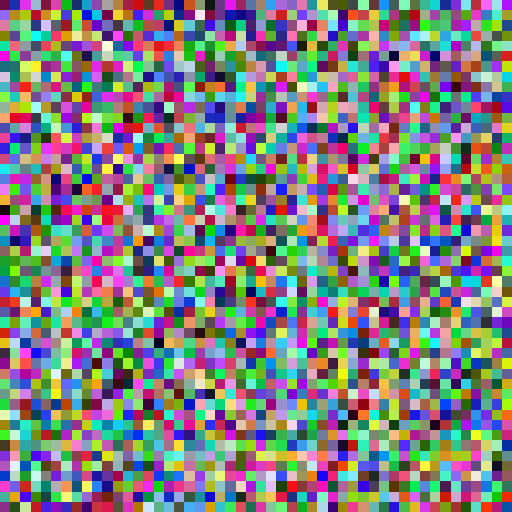

In [7]:
samples = np.random.uniform(0, 255, n_samples)

img = assign_colors_by_chance(samples, grid_size, image_size)

display(img)

We get a wide variety of vivid colors because all brightnesses for red, green, and blue are all equally possible. Pretty, but not very controllable aside from limiting the ranges.

## Normal (Gaussian) Distribution

### Properties

- Bell curve shape

- Defined by mean and standard deviation

- Models natural phenomena

### Artisitic Applications

- Natural variations in sizes

- Organic clustering

- Brush stroke distribution (width, pressure, spacing, etc.)

- Color variation

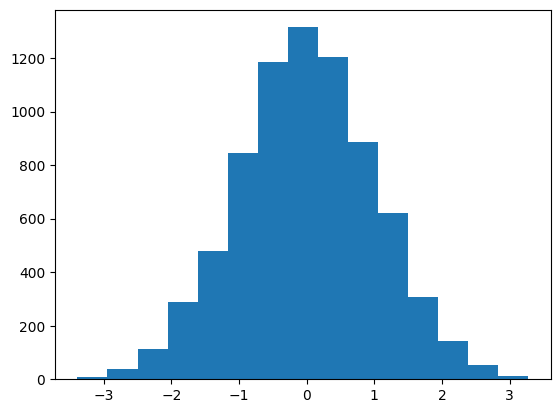

In [22]:
samples = np.random.normal(loc=0, scale=1, size=n_samples)

plot_distribution(samples)

Because the normal distribution is defined by mean and standard deviation, it can be a little tricky getting the parameters right to fit in range you want. Here I will set the mean (`loc`) to 128 and standard deviation (`scale`) to 32 and then limit the values between 0 and 255 using `np.clip()`.

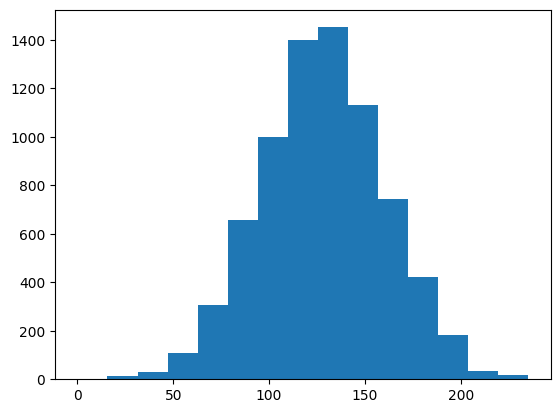

In [23]:
samples = np.clip(np.random.normal(loc=128, scale=32, size=n_samples), 0, 255)

plot_distribution(samples)

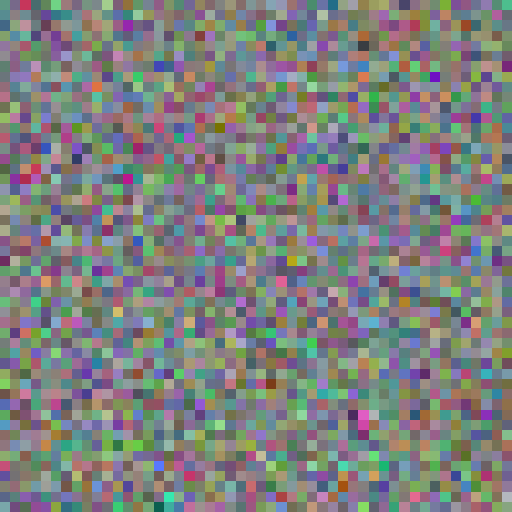

In [24]:
samples = np.clip(np.random.normal(loc=128, scale=32, size=n_samples), 0, 255)

img = assign_colors_by_chance(samples, grid_size, image_size)

display(img)

Notice the muted colors since the values tend toward the mean. Experiment with the `loc` and `scale` parameters to get a better understanding of what they correspond to. Can you make the image darker and more colorful at the same time?

## Exponential Distribution

### Properties

- Rapid initial decay

- Long tail

- Models time between events

- Always positive values

### Artistic Applications

- Particle lifetimes

- Brush stroke lengths

- Event timing

- Size distributions

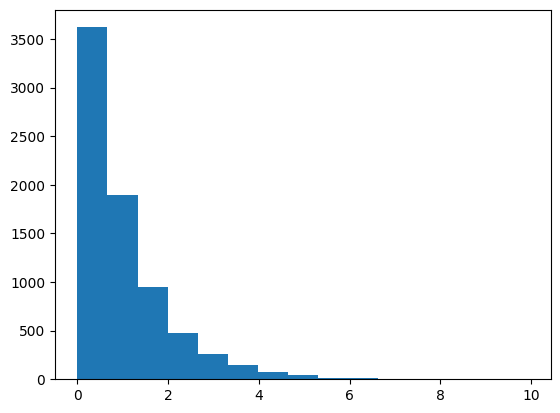

In [25]:
samples = np.random.exponential(scale=1.0, size=n_samples)

plot_distribution(samples)

Again, we want to scale as needed and clip to make sure no value is ever outside of our range [0-256)

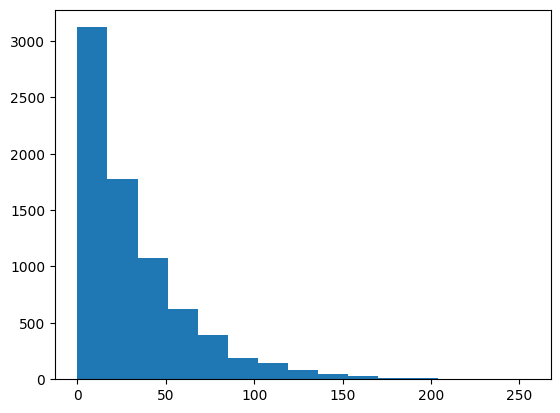

In [26]:
samples = np.clip(np.random.exponential(scale=32.0, size=n_samples), 0, 255)

plot_distribution(samples)

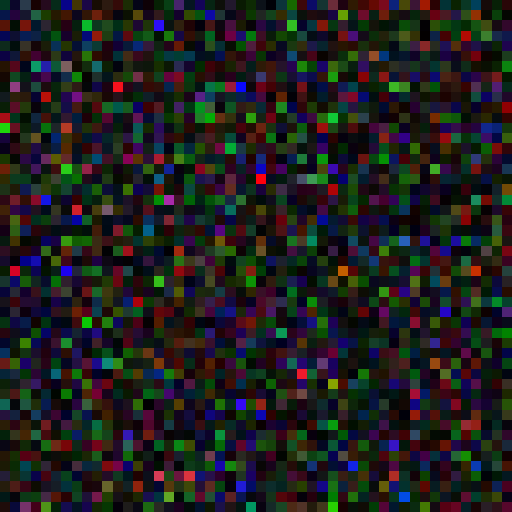

In [32]:
samples = np.clip(np.random.exponential(scale=32.0, size=n_samples), 0, 255)

img = assign_colors_by_chance(samples, grid_size, image_size)

display(img)

## Gradient Noise (Perlin, Simplex)

### Properties

- Smooth randomness

- Coherent across dimensions

- Natural-looking variation

- Controllable frequency

### Artistic Applications

- Terrain generation

- Flowing movement

- Cloud textures

- Organic patterns

It is important to understand some key differences between probability distributions and noise functions:

#### Independence vs. Coherence

**Probability Distribution:** Each value is independently generated. If you sample a normal distribution twice in a row, the values have no relationship to each other.

**Noise Function:** Values are correlated based on their position/time. If you sample Perlin noise at two nearby points, the values will be similar.

#### Reproducibility

**Probability Distribution:** You can reproduce the same sequence of random numbers using a seed, but each number is still independent

**Noise Function:** Given the same input coordinate, you'll always get the same output value. It's more like a mathematical function

#### Dimensionality

**Probability Distribution:** Each sample is a single random event

**Noise Function:** Can be coherently sampled across multiple dimensions (1D, 2D, 3D, etc.) while maintaining smoothness

In [28]:
from opensimplex import seed, noise2array

def simplex_grid(grid_size, scale=1.0, seed_val=0):

    # The noise2array function needs an array of x-coordinates and and array of y-coordinates
    # We will use single array since we just want a square
    coords = np.linspace(0, scale, grid_size[0])

    # Set the seed
    seed(seed_val)

    # Generate a 2d array of simplex noise: values are between -1 and 1
    return noise2array(coords, coords)



Because each sample is no longer an independent event, we need to sample each channel (red, green blue) as a single noise function. Here, we randomize the seed for each.

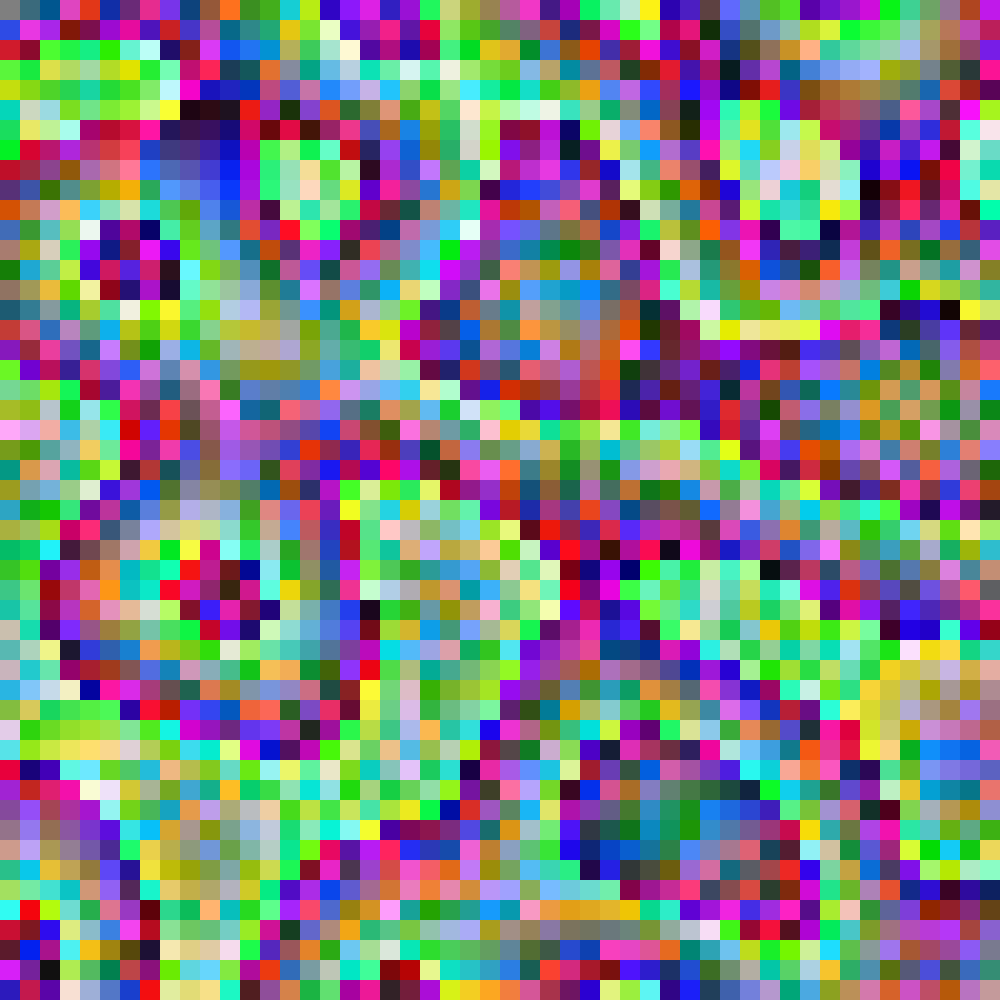

In [65]:
samples = np.zeros(grid_size)

# Set red values
samples[:,:,0] = simplex_grid(grid_size, scale=4, seed_val=np.random.randint(1000))*10
# Set green values
samples[:,:,1] = simplex_grid(grid_size, scale=4, seed_val=np.random.randint(1000))*3
# Set blue values
samples[:,:,2] = simplex_grid(grid_size, scale=6, seed_val=np.random.randint(1000))*10

# Fit values between 0 and 256
samples = (samples / 2 + 0.5) * 255

img = Image.fromarray(np.uint8(samples.reshape(grid_size)))
img = img.resize(image_size, Image.NEAREST)

display(img)

## Activity: Brownian Motion

Gradient noise such as perlin and simplex noise are often used to model terrain and materials in games. One way to make it appear more realistic is to create brownian textures by layering various scales of gradient noise.

Take ~20 minutes to experiment with layering gradient noise. Try to recreate a brownian texture as found in this paper: [https://www.sciencedirect.com/science/article/pii/S1746809418302921]

Here is a simplified black and white version of the previous simplex example to get you started:

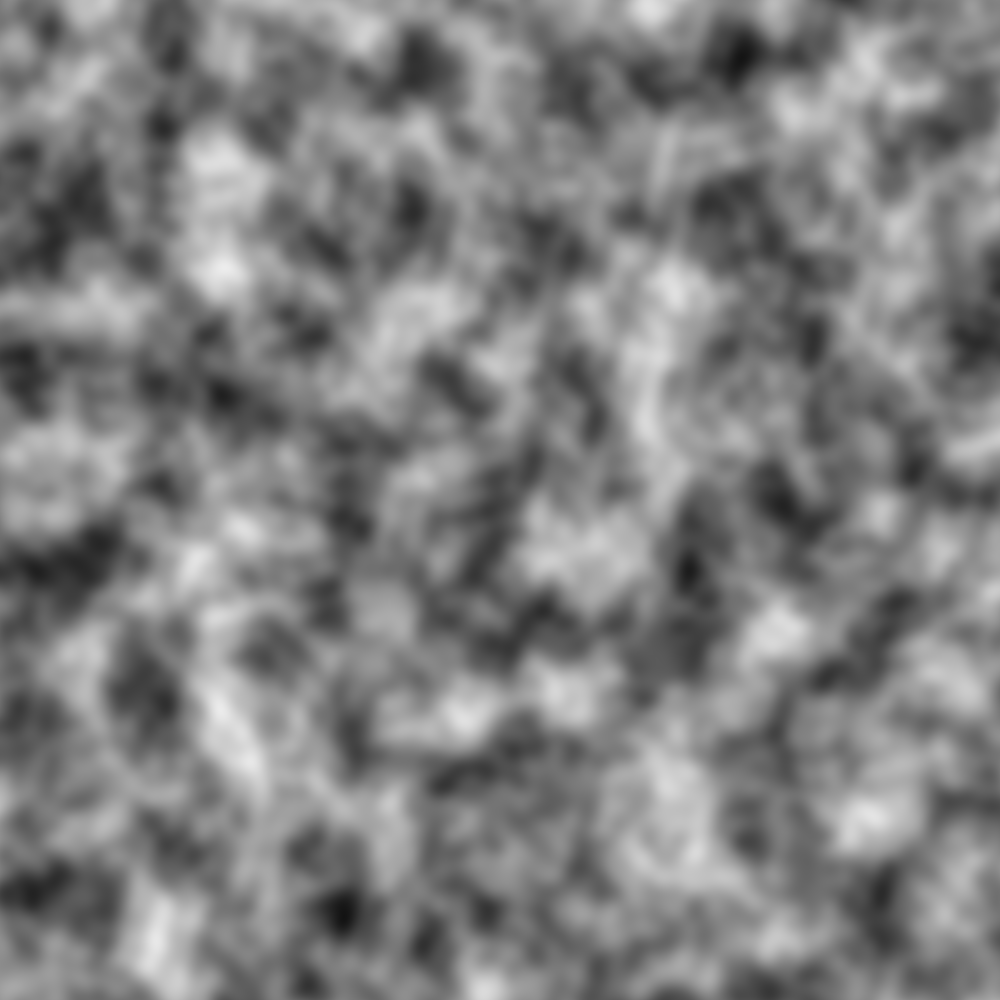

In [63]:
image_size = (1000, 1000)

samples = np.zeros(image_size)

# One layer at scale 4
samples += simplex_grid(image_size, scale=10, seed_val=np.random.randint(1000)) * 2

samples += simplex_grid(image_size, scale=20, seed_val=np.random.randint(1000)) * 1.5

samples += simplex_grid(image_size, scale=23, seed_val=np.random.randint(1000)) * 0.8

samples += simplex_grid(image_size, scale=44, seed_val=np.random.randint(1000)) * 0.6

# Fit values between 0 and 256
samples = np.clip((samples / 7 + 0.5) * 255, 0, 255)

img = Image.fromarray(np.uint8(samples))

display(img)